In [5]:
import os
import shutil

# Define the source and destination directories
source_dir = 'test_data'
destination_dir = 'test'

# create the destination destination directories if it doesn't exist /test
os.makedirs(os.path.join(destination_dir), exist_ok=True)
# Create the destination directories if they don't exist
os.makedirs(os.path.join(destination_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(destination_dir, 'labels'), exist_ok=True)

# Iterate through the subfolders in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # Check if the file is an image or JSON file
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            # Get the folder name
            folder_name = os.path.basename(root)
            # Add the folder name as a prefix to the image file name
            new_file_name = f"{folder_name}_{file}"
            # Copy the image file to the images subfolder in the destination directory
            shutil.copy(os.path.join(root, file), os.path.join(destination_dir, 'images', new_file_name))
        elif file.endswith('.json'):
            # Get the folder name
            folder_name = os.path.basename(root)
            # Add the folder name as a prefix to the JSON file name
            new_file_name = f"{folder_name}_{file}"
            # Copy the JSON file to the labels subfolder in the destination directory
            shutil.copy(os.path.join(root, file), os.path.join(destination_dir, 'labels', new_file_name))


In [9]:
import os
# Define the directory containing the images and JSON files
directory = 'test/images'

# Iterate through the images in the directory
for filename in os.listdir(directory):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Get the corresponding JSON file name
        json_filename = filename.replace('.jpg', '.json').replace('.jpeg', '.json').replace('.png', '.json')
        # Check if the JSON file exists
        if not os.path.exists(os.path.join('test/labels', json_filename)):
            print(f"Missing JSON file for image: {filename}")


6000


In [10]:
import os
import shutil

# Define the source and destination directories
source_dir = 'train_data'
destination_dir = 'train'

# create the destination destination directories if it doesn't exist /test
os.makedirs(os.path.join(destination_dir), exist_ok=True)
# Create the destination directories if they don't exist
os.makedirs(os.path.join(destination_dir, 'images'), exist_ok=True)
os.makedirs(os.path.join(destination_dir, 'labels'), exist_ok=True)

# Iterate through the subfolders in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # Check if the file is an image or JSON file
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            # Get the folder name
            folder_name = os.path.basename(root)
            # Add the folder name as a prefix to the image file name
            new_file_name = f"{folder_name}_{file}"
            # Copy the image file to the images subfolder in the destination directory
            shutil.copy(os.path.join(root, file), os.path.join(destination_dir, 'images', new_file_name))
        elif file.endswith('.json'):
            # Get the folder name
            folder_name = os.path.basename(root)
            # Add the folder name as a prefix to the JSON file name
            new_file_name = f"{folder_name}_{file}"
            # Copy the JSON file to the labels subfolder in the destination directory
            shutil.copy(os.path.join(root, file), os.path.join(destination_dir, 'labels', new_file_name))


In [16]:
import os
# Define the directory containing the images and JSON files
directory = 'train/images'
cnt = 0
# Iterate through the images in the directory
for filename in os.listdir(directory):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Get the corresponding JSON file name
        json_filename = filename.replace('.jpg', '.json').replace('.jpeg', '.json').replace('.png', '.json')
        # Check if the JSON file exists
        if not os.path.exists(os.path.join('train/labels', json_filename)):
            print(f"Missing JSON file for image: {filename}")
        else:
            cnt += 1
print(cnt)


9003


In [18]:
def convert_to_yolo(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    # Calculate box center
    x = (box['x'] + box['width'] / 2.0) * dw
    y = (box['y'] + box['height'] / 2.0) * dh
    # Normalize box width and height
    w = box['width'] * dw
    h = box['height'] * dh
    return (x, y, w, h)

In [21]:
import os
import json
import cv2

# Define the directory containing the images and JSON files
directory = 'test/images'

# Iterate through the images in the directory
for filename in os.listdir(directory):
    # Check if the file is an image
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Get the corresponding JSON file name
        json_filename = filename.replace('.jpg', '.json').replace('.jpeg', '.json').replace('.png', '.json')
        # Check if the JSON file exists
        if os.path.exists(os.path.join('test/labels', json_filename)):
            # Read the JSON file
            with open(os.path.join('test/labels', json_filename)) as f:
                data = json.load(f)
                # read the image 
                image = cv2.imread(os.path.join('test/images', filename))
                image_size = (image.shape[1], image.shape[0])
                
                # Create the output directory if it doesn't exist
                os.makedirs('test/yolo_labels', exist_ok=True)
                
                # Open the output file for YOLO format
                with open(os.path.join('test/yolo_labels', filename.replace('.jpg', '.txt')), 'w') as yolo_file:
                    # Iterate through regions and convert to YOLO format
                    first_key = list(data.keys())[0]
                    
                    for region in data[first_key]['regions']:
                        x, y, w, h = convert_to_yolo(image_size, region['shape_attributes'])
                        # Write YOLO format to file (class is 0)
                        yolo_file.write(f"0 {x} {y} {w} {h}\n")
        else:
            print(f"Missing JSON file for image: {filename}")


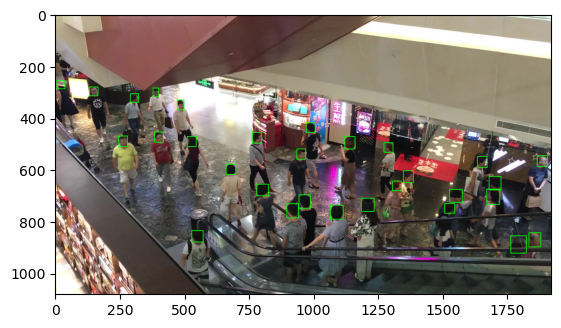

In [28]:
def draw_image_with_boxes(image, boxes):
    for box in boxes:
        x, y, w, h = box
        x1 = int((x - w / 2) * image.shape[1])
        x2 = int((x + w / 2) * image.shape[1])
        y1 = int((y - h / 2) * image.shape[0])
        y2 = int((y + h / 2) * image.shape[0])
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return image
image_path = 'train/images/8_001.jpg'
yolo_label_path = 'train/yolo_labels/8_001.txt'
image = cv2.imread(image_path)
boxes = []
with open(yolo_label_path, 'r') as file:
    for line in file:
        class_id, x, y, w, h = map(float, line.split())
        boxes.append((x, y, w, h))
image_with_boxes = draw_image_with_boxes(image.copy(), boxes)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))